In [1]:
'''
    Titulo: Como a mobilidade urbana se relaciona com o aumento de numero de casos de covid.


'''


import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# %matplotlib notebook

In [2]:


# path = os.path.dirname(os.path.abspath(__file__))


'''
    Peguei essa primeira parte desse site: https://www.viralml.com/video-content.html?v=A6nWZKZpL3k
'''
# Se demorar mto pra carregar o csv, baixa o csv e descomenta essa linha (ps: ta com o \\ do windows)
# gmr_df = pd.read_csv(path+'\\Global_Mobility_Report.csv')  
gmr_df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')
gmr_df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [3]:
# Categories available
categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']
categories_google_mobility

regions_list_BR = [ 'Federal District', 'State of Acre','State of Alagoas','State of Amapá', 'State of Amazonas', 
                    'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
                    'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais',
                    'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí', 
                    'State of Rio de Janeiro', 'State of Rio Grande do Norte',
                    'State of Rio Grande do Sul', 'State of Rondônia', 'State of Roraima', 'State of Santa Catarina', 
                    'State of São Paulo', 'State of Sergipe', 'State of Tocantins'
                  ]

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']


In [4]:
def getAllRegionsGroups(regions_list=regions_list_BR, country="Brazil"):
    regions_dict = {}
#     print(regions_list)
    for r in regions_list:
        sub_df = gmr_df[(gmr_df['country_region']== country) & (gmr_df['sub_region_1']==r) & (pd.isnull(gmr_df['sub_region_2']))]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[r]=sub_df
#     print(regions_dict)
    return regions_dict


def plotGroups(sub_df, region, country="Brazil"):
    # let's plot all time series for this region
    for group in categories_google_mobility:
#         print(group)
        
        fig, ax = plt.subplots(figsize=(16, 4))
        plt.plot(sub_df['date'], sub_df[group], label=group)
        ax.axhline(y=0, color='gray')
        ax.axvline(pd.to_datetime('2020-03-10'), color='r', linestyle='--', lw=2)
        plt.title(country + ' '+ region + ': ' + group)
        plt.legend(loc='best') 
        plt.grid()
        plt.show()
        # plt.savefig(fname=path+'\\'+group+'.png', format='png')


# - - - - - - - -  TESTE - - - - - - - -  
# sdf = getAllRegionsGroups(regions_list=['State of São Paulo'])   #, 'State of Rio de Janeiro'
# print(sdf)
# plotGroups(sdf['State of São Paulo'], 'State of São Paulo')
# plotGroups(sdf['State of Rio de Janeiro'], 'State of RIO')

In [5]:
# - - - - - - - -  CASOS DE COVID - - - - - - - -  
covid_df = pd.read_csv('https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv')
col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

print(covid_df.head)

def getAllRegionsCovid(regions_list=regions_list_BR, regions_abbr=regions_abbr_BR,
                       country="Brazil"):
    regions_dict = {}
    
#     print(regions_list)
    for r in range(len(regions_list)):
        sub_df = covid_df[(covid_df['state']== regions_abbr[r])]
        sub_df.loc[:,'date'] = pd.to_datetime(sub_df.loc[:,'date'])
        sub_df = sub_df.sort_values('date', ascending=True)
        regions_dict[regions_list[r]]=sub_df
#     print(regions_dict)
    return regions_dict


    

<bound method NDFrame.head of        epi_week        date country  state   city  newDeaths  deaths  \
0             9  2020-02-25  Brazil     SP  TOTAL          0       0   
1             9  2020-02-25  Brazil  TOTAL  TOTAL          0       0   
2             9  2020-02-26  Brazil     SP  TOTAL          0       0   
3             9  2020-02-26  Brazil  TOTAL  TOTAL          0       0   
4             9  2020-02-27  Brazil     SP  TOTAL          0       0   
...         ...         ...     ...    ...    ...        ...     ...   
13785       128  2021-07-17  Brazil     SC  TOTAL         26   17546   
13786       128  2021-07-17  Brazil     SE  TOTAL          4    5857   
13787       128  2021-07-17  Brazil     SP  TOTAL          0  134320   
13788       128  2021-07-17  Brazil     TO  TOTAL          0    3396   
13789       128  2021-07-17  Brazil  TOTAL  TOTAL        777  541510   

       newCases  totalCases  deathsMS  ...   recovered   suspects       tests  \
0             1         

In [6]:
# regions_selected = [regions_list_BR[i] for i in [24,25,26]]
# regions_selected_abbr = [regions_abbr_BR[i] for i in [24,25,26]]

# print(regions_selected_abbr)

# cases_df = getAllRegionsCovid()
# mob_df = getAllRegionsGroups()

# print(cases_df)


In [7]:
def getData():
    cases_df = getAllRegionsCovid(regions_list_BR,regions_abbr_BR)
    mob_df = getAllRegionsGroups(regions_list_BR)
    
    mobility_all = []
    cases_all = []
    mobility_dates = []
    cases_dates = []
    mobility_dict = {}
    cases_dict = {}
    
    for r in regions_list_BR:
        newCases = cases_df[r]['newCases'].values
        newCases_norm = newCases/np.max(newCases)
        scaler = MinMaxScaler(feature_range=(-1,1))        
        mobility_norm = scaler.fit_transform(mob_df[r][categories_google_mobility].values)
        
        covid_dates = cases_df[r]['date'].values
        
        mob_dates = mob_df[r]['date'].values
        mob_dates += np.timedelta64(7,'D') # com offset de 7 dias
        
        mobility_dict[r] = mobility_norm
        cases_dict[r] = newCases_norm
        
        for i in range(len(newCases_norm)):
            if covid_dates[i] >= np.datetime64('2020-06-01T00:00:00.000000000'):
                cases_all.append(newCases_norm[i]) 
                cases_dates.append(covid_dates[i])
            
        for i in range(len(mobility_norm)):
            if mob_dates[i] >= np.datetime64('2020-06-01T00:00:00.000000000'):
                mobility_all.append(mobility_norm[i])
                mobility_dates.append(mob_dates[i])

    Y_data = (np.array([cases_all]).T)
    X_data = np.array(mobility_all)    
    
    
    return X_data, Y_data, mobility_dates, cases_dates, mobility_dict, cases_dict


X_data, Y_data, mobility_dates, cases_dates, mobility_dict, cases_dict = getData()

print(X_data.shape)
print(Y_data.shape)

(11232, 6)
(11124, 1)


In [8]:
print(mobility_dates[0] )


2020-06-01T00:00:00.000000000


In [25]:
# i = 0

# for group in categories_google_mobility:
#     print(group)
#     group_values = X_data[:,i]
#     fig, ax = plt.subplots(figsize=(8, 4))
#     plt.plot(cases_dates[:], Y_data[:], label="new_cases")
#     plt.plot(mobility_dates[:], group_values[:], label=group)
   
#     plt.legend(loc='best') 
#     plt.grid()
#     plt.show()
    
#     i+=1

In [26]:
print(cases_dates[0]+np.timedelta64(12,'W'))
print(len(cases_dates))
print(mobility_dates[14],cases_dates[1])

def getCorrespondentData(X_data,Y_data, mobility_dates,cases_dates):
    i = 0
    j = 0
    X_filter = []
    Y_filter = []
    while (i < len(mobility_dates)) and (j < len(cases_dates)):
#         print(mobility_dates[i]," - ", cases_dates[j])
        if mobility_dates[i] == cases_dates[j]:
            if not np.any(np.isnan(X_data[i])) and not np.isnan(Y_data[j]):
                X_filter.append(X_data[i])
                Y_filter.append(Y_data[j])
            i+=1
            j+=1
        elif (mobility_dates[i] < cases_dates[j]) or mobility_dates[i] > (cases_dates[j] + np.timedelta64(30,'W')):
            i += 1
        elif mobility_dates[i] > cases_dates[j]:
            j += 1
             
    return np.array(X_filter), np.array(Y_filter)

2020-08-24T00:00:00.000000000
11124
2020-06-15T00:00:00.000000000 2020-06-02T00:00:00.000000000


In [27]:
X_filter, Y_filter = getCorrespondentData(X_data,Y_data, mobility_dates,cases_dates)
print(X_filter.shape)
print(Y_filter.shape)

# i = 0

# for group in categories_google_mobility:
#     print(group)
#     group_values = X_filter[:,i]
#     fig, ax = plt.subplots(figsize=(16, 4))
#     plt.scatter(group_values[:], Y_filter[:], label=group) #com offset de 7 dias
# #     plt.scatter(group_values[-460:], newCases_norm[-463:-3], label=group) #sem offset de 7 dias 
   
#     plt.legend(loc='best') 
#     plt.grid()
#     plt.show()
    
#     i+=1

(11001, 6)
(11001, 1)


In [56]:
from keras.models import Sequential
from keras.layers import Dense

# X_train = mobility_dict[regions_list_BR[1]][-460:,:]
# Y_train = cases_dict[regions_list_BR[1]][-470:-10]
# Y_train = Y_train.reshape((len(Y_train),1))



X_train = X_filter[:9000]
Y_train = Y_filter[:9000]
X_test = X_filter[9000:]
Y_test = Y_filter[9000:]
# X = mobility_norm[-460:,:]
# Y = newCases_norm[-470:-10]
# Y = Y.reshape((len(Y),1))

print("Mobility Features")
print(X_train[:5])
print("X shape: ",X_train.shape)


print("Covid Cases")
print(Y_train[:5])
print("Y shape: ",Y_train.shape)



Mobility Features
[[-0.50537634 -0.16129032 -0.76397516 -0.35802469 -0.2         0.4375    ]
 [-0.50537634 -0.11290323 -0.73913043 -0.33333333 -0.2         0.375     ]
 [-0.44086022 -0.08064516 -0.68944099 -0.30864198 -0.2         0.3125    ]
 [-0.41935484 -0.03225806 -0.61490683 -0.30864198 -0.2         0.375     ]
 [-0.39784946  0.11290323 -0.71428571 -0.2345679  -0.12380952  0.5       ]]
X shape:  (9000, 6)
Covid Cases
[[0.23021129]
 [0.23525702]
 [0.24093346]
 [0.28476821]
 [0.40523494]]
Y shape:  (9000, 1)


In [57]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [58]:


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=700, batch_size=180)



Epoch 1/700
50/50 [==============================] - 1s 755us/step - loss: 1.7808 - accuracy: 0.0104
Epoch 2/700
50/50 [==============================] - 0s 746us/step - loss: 0.5845 - accuracy: 0.0096
Epoch 3/700
50/50 [==============================] - 0s 704us/step - loss: 0.5787 - accuracy: 0.0101
Epoch 4/700
50/50 [==============================] - 0s 676us/step - loss: 0.5743 - accuracy: 0.0101
Epoch 5/700
50/50 [==============================] - 0s 681us/step - loss: 0.5707 - accuracy: 0.0102
Epoch 6/700
50/50 [==============================] - 0s 708us/step - loss: 0.5690 - accuracy: 0.0108
Epoch 7/700
50/50 [==============================] - 0s 683us/step - loss: 0.5652 - accuracy: 0.0107
Epoch 8/700
50/50 [==============================] - 0s 706us/step - loss: 0.5618 - accuracy: 0.0115
Epoch 9/700
50/50 [==============================] - 0s 702us/step - loss: 0.5645 - accuracy: 0.0103
Epoch 10/700
50/50 [==============================] - 0s 811us/step - loss: 0.5618 - accura

50/50 [==============================] - 0s 714us/step - loss: 0.5346 - accuracy: 0.0115
Epoch 82/700
50/50 [==============================] - 0s 690us/step - loss: 0.5346 - accuracy: 0.0110
Epoch 83/700
50/50 [==============================] - 0s 668us/step - loss: 0.5354 - accuracy: 0.0095
Epoch 84/700
50/50 [==============================] - 0s 692us/step - loss: 0.5387 - accuracy: 0.0107
Epoch 85/700
50/50 [==============================] - 0s 706us/step - loss: 0.5274 - accuracy: 0.0112
Epoch 86/700
50/50 [==============================] - 0s 664us/step - loss: 0.5345 - accuracy: 0.0096
Epoch 87/700
50/50 [==============================] - 0s 652us/step - loss: 0.5354 - accuracy: 0.0115
Epoch 88/700
50/50 [==============================] - 0s 631us/step - loss: 0.5375 - accuracy: 0.0088
Epoch 89/700
50/50 [==============================] - 0s 651us/step - loss: 0.5326 - accuracy: 0.0104
Epoch 90/700
50/50 [==============================] - 0s 672us/step - loss: 0.5368 - accuracy: 

50/50 [==============================] - 0s 698us/step - loss: 0.5336 - accuracy: 0.0103
Epoch 161/700
50/50 [==============================] - 0s 651us/step - loss: 0.5308 - accuracy: 0.0128
Epoch 162/700
50/50 [==============================] - 0s 689us/step - loss: 0.5318 - accuracy: 0.0103
Epoch 163/700
50/50 [==============================] - 0s 660us/step - loss: 0.5297 - accuracy: 0.0100
Epoch 164/700
50/50 [==============================] - 0s 652us/step - loss: 0.5334 - accuracy: 0.0106
Epoch 165/700
50/50 [==============================] - 0s 656us/step - loss: 0.5270 - accuracy: 0.0105
Epoch 166/700
50/50 [==============================] - 0s 665us/step - loss: 0.5302 - accuracy: 0.0113
Epoch 167/700
50/50 [==============================] - 0s 664us/step - loss: 0.5270 - accuracy: 0.0121
Epoch 168/700
50/50 [==============================] - 0s 652us/step - loss: 0.5321 - accuracy: 0.0095
Epoch 169/700
50/50 [==============================] - 0s 639us/step - loss: 0.5328 - a

50/50 [==============================] - 0s 675us/step - loss: 0.5271 - accuracy: 0.0119
Epoch 240/700
50/50 [==============================] - 0s 637us/step - loss: 0.5312 - accuracy: 0.0104
Epoch 241/700
50/50 [==============================] - 0s 735us/step - loss: 0.5302 - accuracy: 0.0108
Epoch 242/700
50/50 [==============================] - 0s 716us/step - loss: 0.5335 - accuracy: 0.0084
Epoch 243/700
50/50 [==============================] - 0s 659us/step - loss: 0.5271 - accuracy: 0.0131
Epoch 244/700
50/50 [==============================] - 0s 775us/step - loss: 0.5276 - accuracy: 0.0109
Epoch 245/700
50/50 [==============================] - 0s 727us/step - loss: 0.5288 - accuracy: 0.0094
Epoch 246/700
50/50 [==============================] - 0s 721us/step - loss: 0.5319 - accuracy: 0.0103
Epoch 247/700
50/50 [==============================] - 0s 692us/step - loss: 0.5348 - accuracy: 0.0100
Epoch 248/700
50/50 [==============================] - 0s 733us/step - loss: 0.5270 - a

50/50 [==============================] - 0s 662us/step - loss: 0.5255 - accuracy: 0.0110
Epoch 319/700
50/50 [==============================] - 0s 697us/step - loss: 0.5275 - accuracy: 0.0105
Epoch 320/700
50/50 [==============================] - 0s 689us/step - loss: 0.5223 - accuracy: 0.0098
Epoch 321/700
50/50 [==============================] - 0s 774us/step - loss: 0.5253 - accuracy: 0.0106
Epoch 322/700
50/50 [==============================] - 0s 672us/step - loss: 0.5286 - accuracy: 0.0089
Epoch 323/700
50/50 [==============================] - 0s 713us/step - loss: 0.5273 - accuracy: 0.0100
Epoch 324/700
50/50 [==============================] - 0s 667us/step - loss: 0.5255 - accuracy: 0.0111
Epoch 325/700
50/50 [==============================] - 0s 657us/step - loss: 0.5243 - accuracy: 0.0116
Epoch 326/700
50/50 [==============================] - 0s 731us/step - loss: 0.5286 - accuracy: 0.0118
Epoch 327/700
50/50 [==============================] - 0s 712us/step - loss: 0.5223 - a

50/50 [==============================] - 0s 690us/step - loss: 0.5232 - accuracy: 0.0097
Epoch 398/700
50/50 [==============================] - 0s 670us/step - loss: 0.5229 - accuracy: 0.0103
Epoch 399/700
50/50 [==============================] - 0s 688us/step - loss: 0.5224 - accuracy: 0.0114
Epoch 400/700
50/50 [==============================] - 0s 688us/step - loss: 0.5250 - accuracy: 0.0099
Epoch 401/700
50/50 [==============================] - 0s 669us/step - loss: 0.5222 - accuracy: 0.0132
Epoch 402/700
50/50 [==============================] - 0s 662us/step - loss: 0.5246 - accuracy: 0.0115
Epoch 403/700
50/50 [==============================] - 0s 674us/step - loss: 0.5248 - accuracy: 0.0102
Epoch 404/700
50/50 [==============================] - 0s 677us/step - loss: 0.5218 - accuracy: 0.0122
Epoch 405/700
50/50 [==============================] - 0s 698us/step - loss: 0.5255 - accuracy: 0.0098
Epoch 406/700
50/50 [==============================] - 0s 687us/step - loss: 0.5223 - a

50/50 [==============================] - 0s 661us/step - loss: 0.5234 - accuracy: 0.0103
Epoch 477/700
50/50 [==============================] - 0s 710us/step - loss: 0.5215 - accuracy: 0.0119
Epoch 478/700
50/50 [==============================] - 0s 703us/step - loss: 0.5212 - accuracy: 0.0106
Epoch 479/700
50/50 [==============================] - 0s 660us/step - loss: 0.5277 - accuracy: 0.0105
Epoch 480/700
50/50 [==============================] - 0s 642us/step - loss: 0.5215 - accuracy: 0.0119
Epoch 481/700
50/50 [==============================] - 0s 682us/step - loss: 0.5232 - accuracy: 0.0109
Epoch 482/700
50/50 [==============================] - 0s 699us/step - loss: 0.5198 - accuracy: 0.0110
Epoch 483/700
50/50 [==============================] - 0s 698us/step - loss: 0.5222 - accuracy: 0.0129
Epoch 484/700
50/50 [==============================] - 0s 683us/step - loss: 0.5246 - accuracy: 0.0096
Epoch 485/700
50/50 [==============================] - 0s 694us/step - loss: 0.5215 - a

50/50 [==============================] - 0s 685us/step - loss: 0.5192 - accuracy: 0.0109
Epoch 556/700
50/50 [==============================] - 0s 687us/step - loss: 0.5224 - accuracy: 0.0129
Epoch 557/700
50/50 [==============================] - 0s 679us/step - loss: 0.5239 - accuracy: 0.0094
Epoch 558/700
50/50 [==============================] - 0s 689us/step - loss: 0.5217 - accuracy: 0.0120
Epoch 559/700
50/50 [==============================] - 0s 689us/step - loss: 0.5218 - accuracy: 0.0107
Epoch 560/700
50/50 [==============================] - 0s 670us/step - loss: 0.5199 - accuracy: 0.0119
Epoch 561/700
50/50 [==============================] - 0s 670us/step - loss: 0.5248 - accuracy: 0.0105
Epoch 562/700
50/50 [==============================] - 0s 679us/step - loss: 0.5213 - accuracy: 0.0127
Epoch 563/700
50/50 [==============================] - 0s 664us/step - loss: 0.5245 - accuracy: 0.0118
Epoch 564/700
50/50 [==============================] - 0s 651us/step - loss: 0.5221 - a

50/50 [==============================] - 0s 670us/step - loss: 0.5201 - accuracy: 0.0121
Epoch 635/700
50/50 [==============================] - 0s 698us/step - loss: 0.5225 - accuracy: 0.0117
Epoch 636/700
50/50 [==============================] - 0s 671us/step - loss: 0.5254 - accuracy: 0.0098
Epoch 637/700
50/50 [==============================] - 0s 664us/step - loss: 0.5222 - accuracy: 0.0125
Epoch 638/700
50/50 [==============================] - 0s 708us/step - loss: 0.5257 - accuracy: 0.0101
Epoch 639/700
50/50 [==============================] - 0s 711us/step - loss: 0.5226 - accuracy: 0.0107
Epoch 640/700
50/50 [==============================] - 0s 695us/step - loss: 0.5230 - accuracy: 0.0107
Epoch 641/700
50/50 [==============================] - 0s 669us/step - loss: 0.5257 - accuracy: 0.0090
Epoch 642/700
50/50 [==============================] - 0s 681us/step - loss: 0.5248 - accuracy: 0.0115
Epoch 643/700
50/50 [==============================] - 0s 725us/step - loss: 0.5176 - a

In [59]:
model.output_shape

(None, 1)

In [60]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy*100))

282/282 [==============================] - 0s 469us/step - loss: 0.5215 - accuracy: 0.0108
Accuracy: 1.08


In [61]:
# newCases = cases_df[regions_selected[2]]['newCases'].values
# newCases_norm = newCases/np.max(newCases)
# mobility_norm = scaler.fit_transform(mob_df[regions_selected[2]][categories_google_mobility].values)

In [62]:
# X_test = mobility_norm[-460:,:]
# Y_test = newCases_norm[-470:-10]
# Y_test = Y_test.reshape((len(Y_test),1))
# X_test = mobility_dict[regions_list_BR[21]][-460:,:]
# Y_test = cases_dict[regions_list_BR[21]][-460:]
# Y_test = Y_test.reshape((len(Y_test),1))

print("MobilitY_test Features")
print(X_test[:5])
print("X_test shape: ",X_test.shape)
print("Teste ",regions_list_BR[21])

print("Covid Cases")
print(Y_test[:5])
print("Y_test shape: ",Y_test.shape)

_, accuracY_test = model.evaluate(X_test, Y_test)
print('AccuracY_test: %.2f' % (accuracY_test*100))

MobilitY_test Features
[[-0.40952381 -0.13235294 -0.74879227 -0.47916667 -0.2244898   0.65217391]
 [-0.42857143 -0.04411765 -0.77777778 -0.39583333 -0.14285714  0.56521739]
 [-0.54285714 -0.08823529 -0.88405797 -0.58333333  0.04081633  0.39130435]
 [-0.92380952 -0.29411765 -0.97101449 -0.70833333  0.08163265  0.56521739]
 [-0.37142857 -0.11764706 -0.82608696 -0.47916667 -0.08163265  0.39130435]]
X_test shape:  (2001, 6)
Teste  State of Rondônia
Covid Cases
[[0.04855967]
 [0.05349794]
 [0.01358025]
 [0.00246914]
 [0.02222222]]
Y_test shape:  (2001, 1)
63/63 [==============================] - 0s 508us/step - loss: 0.5190 - accuracy: 0.0090
AccuracY_test: 0.90


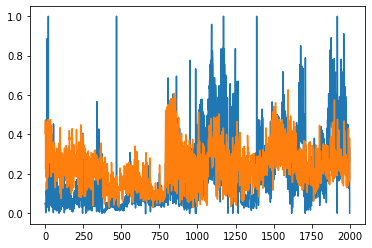

In [63]:
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Roraima


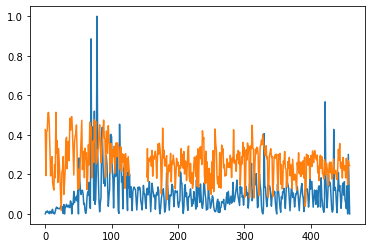

In [64]:
X_test = mobility_dict[regions_list_BR[22]][-460:,:]
Y_test = cases_dict[regions_list_BR[22]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[22])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Santa Catarina


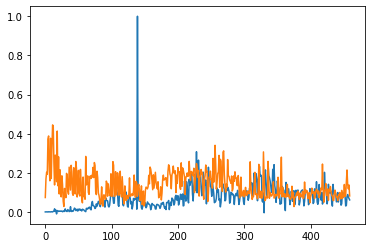

In [65]:
X_test = mobility_dict[regions_list_BR[23]][-460:,:]
Y_test = cases_dict[regions_list_BR[23]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[23])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of São Paulo


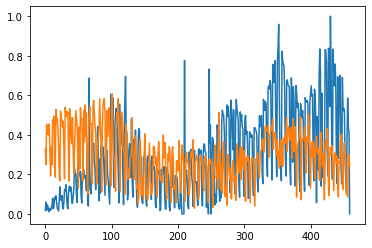

In [66]:
X_test = mobility_dict[regions_list_BR[24]][-460:,:]
Y_test = cases_dict[regions_list_BR[24]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[24])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Sergipe


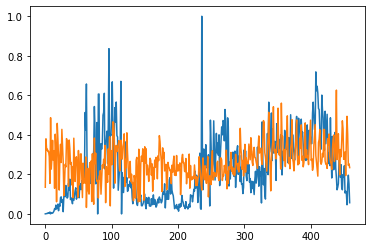

In [67]:
X_test = mobility_dict[regions_list_BR[25]][-460:,:]
Y_test = cases_dict[regions_list_BR[25]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[25])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()

Teste  State of Tocantins


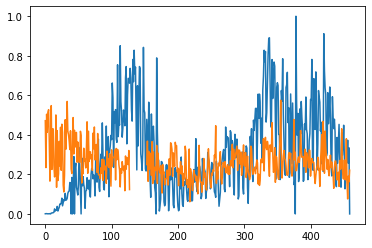

In [68]:
X_test = mobility_dict[regions_list_BR[26]][-460:,:]
Y_test = cases_dict[regions_list_BR[26]][-460:]
Y_test = Y_test.reshape((len(Y_test),1))
print("Teste ",regions_list_BR[26])
predict = model.predict(X_test)
plt.plot(Y_test)
plt.plot(predict)
plt.show()